Tensors 
==========================

Tensors are a specialized data structure that are very similar to arrays and matrices. 
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to `NumPy’s <https://numpy.org/>`_ ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and
NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see `bridge-to-np-label`). Tensors 
are also optimized for automatic differentiation (we'll see more about that later in the `Autograd <autogradqs_tutorial.html>`__ 
section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

Initializing a Tensor
---------------------------
Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.


```python

import torch
import numpy as np

data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

np_array = np.array(data)
x_np = torch.from_numpy(np_array)


x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")


shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

```


## Operations on Tensors


Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, 
indexing, slicing), sampling and more are
comprehensively described `here <https://pytorch.org/docs/stable/torch.html>`__.

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using 
``.to`` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!

```python
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
```
**Standard numpy-like indexing and slicing:**

```python
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)
```

**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also `torch.stack <https://pytorch.org/docs/stable/generated/torch.stack.html>`__,
another tensor joining op that is subtly different from ``torch.cat``.

```python
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)
```
**Arithmetic operations**



```python

# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
```

**Single-element tensors** If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using ``item()``:

```python
agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))


t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

```

## Working with data

### MUST READ DOCUMENTATION [HERE](https://pytorch.org/docs/stable/data.html)

PyTorch has two `primitives to work with data <https://pytorch.org/docs/stable/data.html>`_: 
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.


PyTorch offers domain-specific libraries such as `TorchText <https://pytorch.org/text/stable/index.html>`_, 
`TorchVision <https://pytorch.org/vision/stable/index.html>`_, and `TorchAudio <https://pytorch.org/audio/stable/index.html>`_, 
all of which include datasets. For this tutorial, we  will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like 
CIFAR, COCO (`full list here <https://pytorch.org/vision/stable/datasets.html>`_). In this tutorial, we
use the FashionMNIST dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and
``target_transform`` to modify the samples and labels respectively.



We pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports
automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element 
in the dataloader iterable will return a batch of 64 features and labels.

### Transforms 

Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels - that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

```python

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),target_transform=ToTensor()
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),target_transform=ToTensor()
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break
    
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
```




Creating a Custom Dataset for your files
---------------------------------------------------

A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`. 
Take a look at this implementation; the FashionMNIST images are stored 
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``. 

In the next sections, we'll break down what's happening in each of these functions.

__init__
------------------

The __init__ function is run once when instantiating the Dataset object. We initialize
the directory containing the images, the annotations file, and both transforms (covered 
in more detail in the next section). 



The labels.csv file looks like: ::

    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9
__len__
------------------

The __len__ function returns the number of samples in our dataset.


__getitem__
------------------

The __getitem__ function loads and returns a sample from the dataset at the given index ``idx``. 
Based on the index, it identifies the image's location on disk, converts that to a tensor using ``read_image``, retrieves the 
corresponding label from the csv data in ``self.img_labels``, calls the transform functions on them (if applicable), and returns the 
tensor image and corresponding label in a tuple.




```python
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
```

Creating Models
------------------
To define a neural network in PyTorch, we create a class that inherits 
from `nn.Module <https://pytorch.org/docs/stable/generated/torch.nn.Module.html>`_. We define the layers of the network
in the ``__init__`` function and specify how data will pass through the network in the ``forward`` function. To accelerate 
operations in the neural network, we move it to the GPU if available.

```python

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

```

Optimizing the Model Parameters
----------------------------------------
To train a model, we need a `loss function <https://pytorch.org/docs/stable/nn.html#loss-functions>`_
and an `optimizer <https://pytorch.org/docs/stable/optim.html>`_. 



In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and 
backpropagates the prediction error to adjust the model's parameters. 


The training process is conducted over several iterations (*epochs*). During each epoch, the model learns 
parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the
accuracy increase and the loss decrease with every epoch.

We also check the model's performance against the test dataset to ensure it is learning.

Hyperparameters 
-----------------

Hyperparameters are adjustable parameters that let you control the model optimization process. 
Different hyperparameter values can impact model training and convergence rates 
(`read more <https://pytorch.org/tutorials/beginner/hyperparameter_tuning_tutorial.html>`__ about hyperparameter tuning)

We define the following hyperparameters for training:
 - **Number of Epochs** - the number times to iterate over the dataset
 - **Batch Size** - the number of data samples propagated through the network before the parameters are updated
 - **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.


Optimization Loop
-----------------

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each 
iteration of the optimization loop is called an **epoch**. 

Each epoch consists of two main parts:
 - **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.
 - **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop. Jump ahead to 
see the `full-impl-label` of the optimization loop.

Loss Function
-----------------

When presented with some training data, our untrained network is likely not to give the correct 
answer. **Loss function** measures the degree of dissimilarity of obtained result to the target value, 
and it is the loss function that we want to minimize during training. To calculate the loss we make a 
prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include `nn.MSELoss <https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss>`_ (Mean Square Error) for regression tasks, and 
`nn.NLLLoss <https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss>`_ (Negative Log Likelihood) for classification. 
`nn.CrossEntropyLoss <https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss>`_ combines ``nn.LogSoftmax`` and ``nn.NLLLoss``.

We pass our model's output logits to ``nn.CrossEntropyLoss``, which will normalize the logits and compute the prediction error.

Optimizer
-----------------

Optimization is the process of adjusting model parameters to reduce model error in each training step. **Optimization algorithms** define how this process is performed (in this example we use Stochastic Gradient Descent).
All optimization logic is encapsulated in  the ``optimizer`` object. Here, we use the SGD optimizer; additionally, there are many `different optimizers <https://pytorch.org/docs/stable/optim.html>`_ 
available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.

Inside the training loop, optimization happens in three steps:
 * Call ``optimizer.zero_grad()`` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
 * Backpropagate the prediction loss with a call to ``loss.backwards()``. PyTorch deposits the gradients of the loss w.r.t. each parameter. 
 * Once we have our gradients, we call ``optimizer.step()`` to adjust the parameters by the gradients collected in the backward pass.  



```python

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
```

Saving Models
-------------
A common way to save a model is to serialize the internal state dictionary (containing the model parameters).

```python

torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

```
Loading Models
----------------------------

The process for loading a model includes re-creating the model structure and loading
the state dictionary into it. 


```python
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
```

## Homework Items

* Find an Image Dataset from Kaggle.com and download it to the `ai01` server using the [Kaggle API](https://www.kaggle.com/docs/api) command
* Create a custom DataLoader for the Image dataset
* Transform and resize the images to 28x28
* Build and train a custom Neural Network


https://www.kaggle.com/puneet6060/intel-image-classification

In [1]:
from torch.datasets import MNIST

ModuleNotFoundError: No module named 'torch.datasets'

In [ ]:
#!pip3 install --user torch

In [ ]:
#!pip3 install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio==0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html



In [ ]:
#!kaggle datasets download --force -d puneet6060/intel-image-classification

In [2]:
#!pip install --user kaggle


In [1]:
from torch.utils.data import DataLoader

In [4]:
#mkdir datasets

In [5]:
#cd datasets

In [6]:
#mv ../seg_test .

In [7]:
#ls -la

In [3]:
# !unzip datasets/intel-image-classification.zip

In [9]:
#pwd

In [4]:
import os

import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import numpy as np
from torchvision import datasets
from torchvision.datasets import ImageFolder
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
from PIL import Image
#ImageFolder("/home/cassidy/datasets/seg_train/seg_train")
import glob
class MyCustomImageDataset(Dataset):
    def __init__(self, img_dir, train=True, transform=None, target_transform=None):
        self.img_labels = ["buildings", "forest", "glacier", "mountain", "sea", "street"];
        self.img_dir = img_dir
        if train:
            self.img_dir = os.path.join(self.img_dir, "seg_train", "seg_train")
        else:
            self.img_dir = os.path.join(self.img_dir, "seg_test", "seg_test")
        self.images=glob.glob(os.path.join(self.img_dir,"*","*"))
        
        self.transform = transform
        self.target_transform = target_transform
        self.classes=["buildings","forest","glacier","mountain","sea","street"]
        self.class_idx=dict(zip(self.classes,range(len(self.classes))))
        print(self.class_idx)
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        label=self.images[idx].split("/")[-2]
        #print(self.images)
        #print(self.class_idx)
        image=Image.open(self.images[idx])
        label=self.class_idx[label]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


In [5]:
#!pip install --user matplotlib
ds=MyCustomImageDataset("/home/cassidy/datasets/")


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}
Shape of X [N, C, H, W]:  torch.Size([64, 3, 28, 28])
Shape of y:  torch.Size([64]) torch.int64
Feature batch shape: torch.Size([64, 3, 28, 28])
Labels batch shape: torch.Size([64])


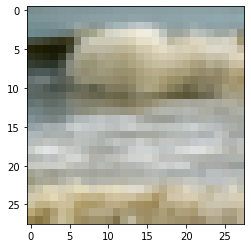

Label: 4


In [6]:
#import torch
#from torch import nn
#from torch.utils.data import DataLoader
#from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose, Resize
from torch.nn.functional import interpolate
from torchvision.transforms.functional import to_tensor
import matplotlib.pyplot as plt


#transformFunc=Lambda(lambda y: F.interpolate(y, (28, 28)))
# Download training data from open datasets.
training_data = MyCustomImageDataset(
    img_dir="/home/cassidy/datasets/",
    train=True,
    transform=Compose([Resize((28, 28)),ToTensor()])
)

# Download test data from open datasets.
test_data = MyCustomImageDataset(
    img_dir="/home/cassidy/datasets/",
    train=False,
    transform=Compose([Resize((28, 28)),ToTensor()])
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
#plt.imshow(img, cmap="gray")
plt.imshow(img.permute(1, 2, 0))
plt.show()
print(f"Label: {label}")

In [7]:
len(train_dataloader)

214

In [8]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.Conv2d_relu_stack = nn.Sequential(
            #nn.Linear(28*28, 512),
            #Conv2D TODO: Homework item
            nn.Conv2d(3, 32, 3, stride=2),
            nn.ReLU(),
            nn.Conv2d(32, 128, 3,stride=2),
            nn.ReLU(),

        )
        self.linear_relu_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear((6)**2*128, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 6)
        )

    def forward(self, x):
        #x = self.flatten(x)
        #print(x.shape)
        #print(x)
        x = torch.div(x, 256)
        #print(x)
        x=self.Conv2d_relu_stack(x)
        #print(x.shape)
        logits = self.linear_relu_stack(x)
        #print(logits.shape)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Conv2d_relu_stack): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 128, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
  )
  (linear_relu_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4608, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=6, bias=True)
  )
)


In [14]:
model(X.to("cuda"))

tensor([[ 0.0042, -0.0453,  0.0062,  0.0199,  0.0407,  0.0241],
        [ 0.0042, -0.0453,  0.0061,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0061,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0061,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0200,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0199,  0.0407,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0199,  0.0407,  0.0241],
        [ 0.0042, -0.0453,  0.0061,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0199,  0.0406,  0.0241],
        [ 0.0042, -0.0453,  0.0062,  0.0

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    

In [16]:

for i in range(100):
    train(train_dataloader, model, loss_fn, optimizer)
# test(test_dataloader, model, loss_fn)

loss: 1.759761  [    0/13644]
loss: 1.752521  [ 6400/13644]
loss: 1.794983  [12800/13644]
loss: 1.762895  [    0/13644]
loss: 1.751263  [ 6400/13644]
loss: 1.790818  [12800/13644]
loss: 1.766016  [    0/13644]
loss: 1.750262  [ 6400/13644]
loss: 1.787054  [12800/13644]
loss: 1.768973  [    0/13644]
loss: 1.749275  [ 6400/13644]
loss: 1.783479  [12800/13644]
loss: 1.771759  [    0/13644]
loss: 1.748365  [ 6400/13644]
loss: 1.780068  [12800/13644]
loss: 1.774425  [    0/13644]
loss: 1.747472  [ 6400/13644]
loss: 1.776983  [12800/13644]
loss: 1.776916  [    0/13644]
loss: 1.746636  [ 6400/13644]
loss: 1.774120  [12800/13644]
loss: 1.779270  [    0/13644]
loss: 1.745844  [ 6400/13644]
loss: 1.771418  [12800/13644]
loss: 1.781468  [    0/13644]
loss: 1.745089  [ 6400/13644]
loss: 1.768856  [12800/13644]
loss: 1.783542  [    0/13644]


KeyboardInterrupt: 

In [17]:
test(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 17.5%, Avg loss: 1.790661 



In [39]:
#     import os
#     folder = "/home/cassidy/datasets/seg_test/seg_test/buildings"
#     for count, filename in enumerate(os.listdir(folder), start=0):
#         dst = f"{str(count)}.jpg"
#         src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
#         dst =f"{folder}/{dst}"
#         print(src + " " + dst)

         
#         # rename() function will
#         # rename all the files
#         os.rename(src, dst)

/home/cassidy/datasets/seg_test/seg_test/buildings/a_364.jpg /home/cassidy/datasets/seg_test/seg_test/buildings/0.jpg
/home/cassidy/datasets/seg_test/seg_test/buildings/a_160.jpg /home/cassidy/datasets/seg_test/seg_test/buildings/1.jpg
/home/cassidy/datasets/seg_test/seg_test/buildings/a_208.jpg /home/cassidy/datasets/seg_test/seg_test/buildings/2.jpg
/home/cassidy/datasets/seg_test/seg_test/buildings/a_275.jpg /home/cassidy/datasets/seg_test/seg_test/buildings/3.jpg
/home/cassidy/datasets/seg_test/seg_test/buildings/a_258.jpg /home/cassidy/datasets/seg_test/seg_test/buildings/4.jpg
/home/cassidy/datasets/seg_test/seg_test/buildings/a_393.jpg /home/cassidy/datasets/seg_test/seg_test/buildings/5.jpg
/home/cassidy/datasets/seg_test/seg_test/buildings/a_156.jpg /home/cassidy/datasets/seg_test/seg_test/buildings/6.jpg
/home/cassidy/datasets/seg_test/seg_test/buildings/a_44.jpg /home/cassidy/datasets/seg_test/seg_test/buildings/7.jpg
/home/cassidy/datasets/seg_test/seg_test/buildings/a_176.

todo:

* Use a Conv2D layer as input to the model, and then a Flatten Layer and finally Linear Layers. I should use Relu in between and look up "Conv-Net" on Google
* go back and review how to create a custom dataset and dataloaders

todo: 
train and test the model with the dataloader and try to optimize it